# Logistička regresija

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
np.random.seed(10)

U zadatku binarne klasifikacije, ciljna promenljiva može imati dve vrednosti. Njih obično obeležavamo sa `0` i `1` ili `-1` i `1`. Za klasu kojoj je pridruženo obeležje `0` (ili `-1`) kažemo da je **negativna** klasa, dok za klasu kojoj je pridruženo obeležje `1` kažemo da je **pozitivna** klasa. 

**Logistička regresija** (engl. logistic regression) je jedan od osnovnih modela binarne klasifikacije. Ona pretpostavlja linearnu vezu između ulaznih veličina $X_1$, $X_2$, ..., $X_m$. Ciljna funkcija logističke regresije je zadata formulom $$f_\beta(X)= \frac{1}{1+e^{-(\beta_0 + \beta_1X_1 + \ldots + \beta_mX_m)}} = \frac{1}{1+e^{-\beta^T X}} = \sigma(\beta^TX)$$ gde je $\sigma(x)$ sigmoidna funkcija određena jednačinom $\sigma(x) = \frac{1}{1+e^{-x}}$. Vrednost ciljne funkcije se može interpretirati kao verovatnoća pripadnosti određenoj klasi: ukoliko je njena vrednost veća od 0.5, klasifikator predviđa pozitivnu klasu, dok u suprotnom predviđa negativnu klasu. 

## Sigmoidna funkcija

Nacrtaćemo grafik sigmoidne funkcije na ekvidistantnoj mreži 100 tačaka u intervalu od [-10, 10].

In [3]:
N = 100
x = np.linspace(-10, 10, N)
y = 1/(1 + np.exp(-x))

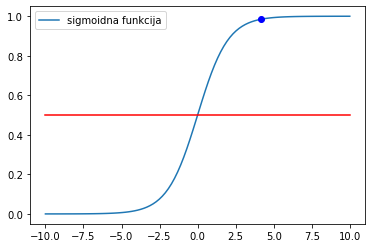

In [4]:
plt.plot(x, y, label = 'sigmoidna funkcija')
plt.plot(x, [0.5]*N, color = 'red')
plt.plot(x[70], y[70], color='blue', marker='o')
plt.legend(loc = 'best')
plt.show()

Ukoliko je vrednost sigmoidne funkcije u tački `x` veća od `0.5`, njoj se pridružuje obeležje `1`. U suprotnom joj se pridružuje obeležje `0`.

## Unakrsna entropija

Parametri modela logističke regresije $\beta_0$, $\beta_1$, ..., $\beta_m$ se određuju minimizacijom funkcije gubitka. U slučaju logističke regresije to je `unakrsna entropija` (engl. binary crossentropy) određena izrazom $$-\sum_{i=1}^{N} (y_i logf_\beta(x_i) + (1-y_i)log(1-f_\beta(x_i)))$$ u kojem $(x_i, y_i)$ predstavljaju instance skupa za treniranje, a $N$ ukupan broj instanci ovog skupa.

Nacrtaćemo grafike funkcija $log(y)$ i $1-log(y)$ koji figurišu u izrazu unakrsne entropije sa idejom da bolje razumemo način na koji se izračunava greška.

Za iscrtavanje grafika funkcije iskoristićemo ekvidistantnu mrežu 50 tačaka iz intervala [0, 1].

In [5]:
N = 50
y_i = np.linspace(0, 1, N, endpoint=True)

# vrednosti funkcije log(y)
loss_part_positive = -np.log(y_i) 

# vrednosti funkcije log(1-y)
loss_part_negative = -np.log(1-y_i)

<ipython-input-5-e61b965af667>:5: RuntimeWarning: divide by zero encountered in log
  loss_part_positive = -np.log(y_i)
<ipython-input-5-e61b965af667>:8: RuntimeWarning: divide by zero encountered in log
  loss_part_negative = -np.log(1-y_i)


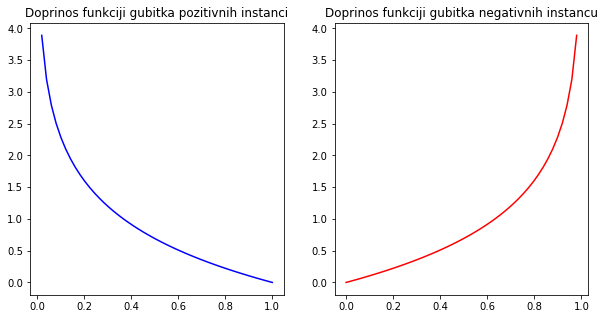

In [6]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.title('Doprinos funkciji gubitka pozitivnih instanci')
plt.plot(y_i, loss_part_positive, color ='b')

plt.subplot(1, 2, 2)
plt.title('Doprinos funkciji gubitka negativnih instancu')
plt.plot(y_i, loss_part_negative, color ='r')

plt.show()

Ako je za instancu $(x_i, y_i)$ očekivana vrednost klasifikatora $1$, što više grešimo sa predikcijom $y_i$ i što više odstupamo od očekivane vrednosti, veći je i doprinos funkciji gubitka (grafik levo). Ako je očekivana vrednost klasifikatora $0$, što više odstupamo od ove vrednosti, veći je doprinos funkciji gubitka (grafik desno). 

# Primer binarne klasifikacije

U primeru koji sledi model logističke regresije biće iskorišćen za klasifikaciji tumora dojke na maligne i benigne. Koristićemo Viskonsis skup podataka o kojem se može više pročitati na zvaničnom [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) sajtu.

In [7]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

### Analiza podataka

### Podela podataka na skup za treniranje i skup za testiranje

### Standaradizacija podataka

### Obučavanje modela

### Evaluacija

### Analiza sigurnosti klasifikatora

### Čuvanje modela i buduće korišćenje

Za čuvanje modela može se koristiti paket `pickle` i njegova metoda `dump` za serijalizaciju.

In [59]:
import pickle

In [60]:
with open('models/lr_classifier.model.pickle', 'wb') as model_file:
    pickle.dump(model, model_file)

In [61]:
with open('models/lr_classifier.scaler.pickle', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

Pre budućeg korišćenja, model i skaler se mogu deserijalizovati korišćenjem metode `load` paketa `pickle`.

In [62]:
with open('models/lr_classifier.model.pickle', 'rb') as model_file:
    model_revived = pickle.load(model_file)

In [63]:
with open('models/lr_classifier.scaler.pickle', 'rb') as scaler_file:
    scaler_revived = pickle.load(scaler_file)

### Primena modela na nove instance

Kada bude potrebno klasifikovati novu instancu `x_new` mogu se preduzeti sledeći koraci: 

In [64]:
x_new = np.random.rand(N).reshape(1, -1)

In [65]:
x_new_transformed = scaler_revived.transform(x_new)

In [66]:
y_new = model_revived.predict(x_new_transformed)

In [67]:
y_new

array([1])